# Questão 2

Escreva um programa que dado $Y = a.X^2 + b$, obtenha o histograma de f(Y), sendo que X é uma variável aleatória uniformemente distribuída entre 0 e 1. Teste o programa para as combinações de $a = 0, 0.5, 1, 2$ e $b= -1, 0,1,2,4$. e compare com os respectivos f(Y) teóricos. Analise como se comportam $E[X], E[Y], E[X2], E[Y2], Var(X), Var(Y), \sigma(X), \sigma(Y), Corr(X,Y)$ e $\rho(X,Y)$ em função do valores de a e b. Utilize ao menos 1.000 amostras para X.

In [1]:
# Importação das bilbiotecas
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parâmetros
a_values = [0, 0.5, 1, 2]
b_values = [-1, 0, 1, 2, 4]
num_samples = 1000

In [3]:
# Função para calcular Y
def calculate_Y(X, a, b):
    return a * X**2 + b

In [4]:
# Inicialização de X
X = stats.uniform.rvs(loc=0, scale=1, size=1000, random_state=None)

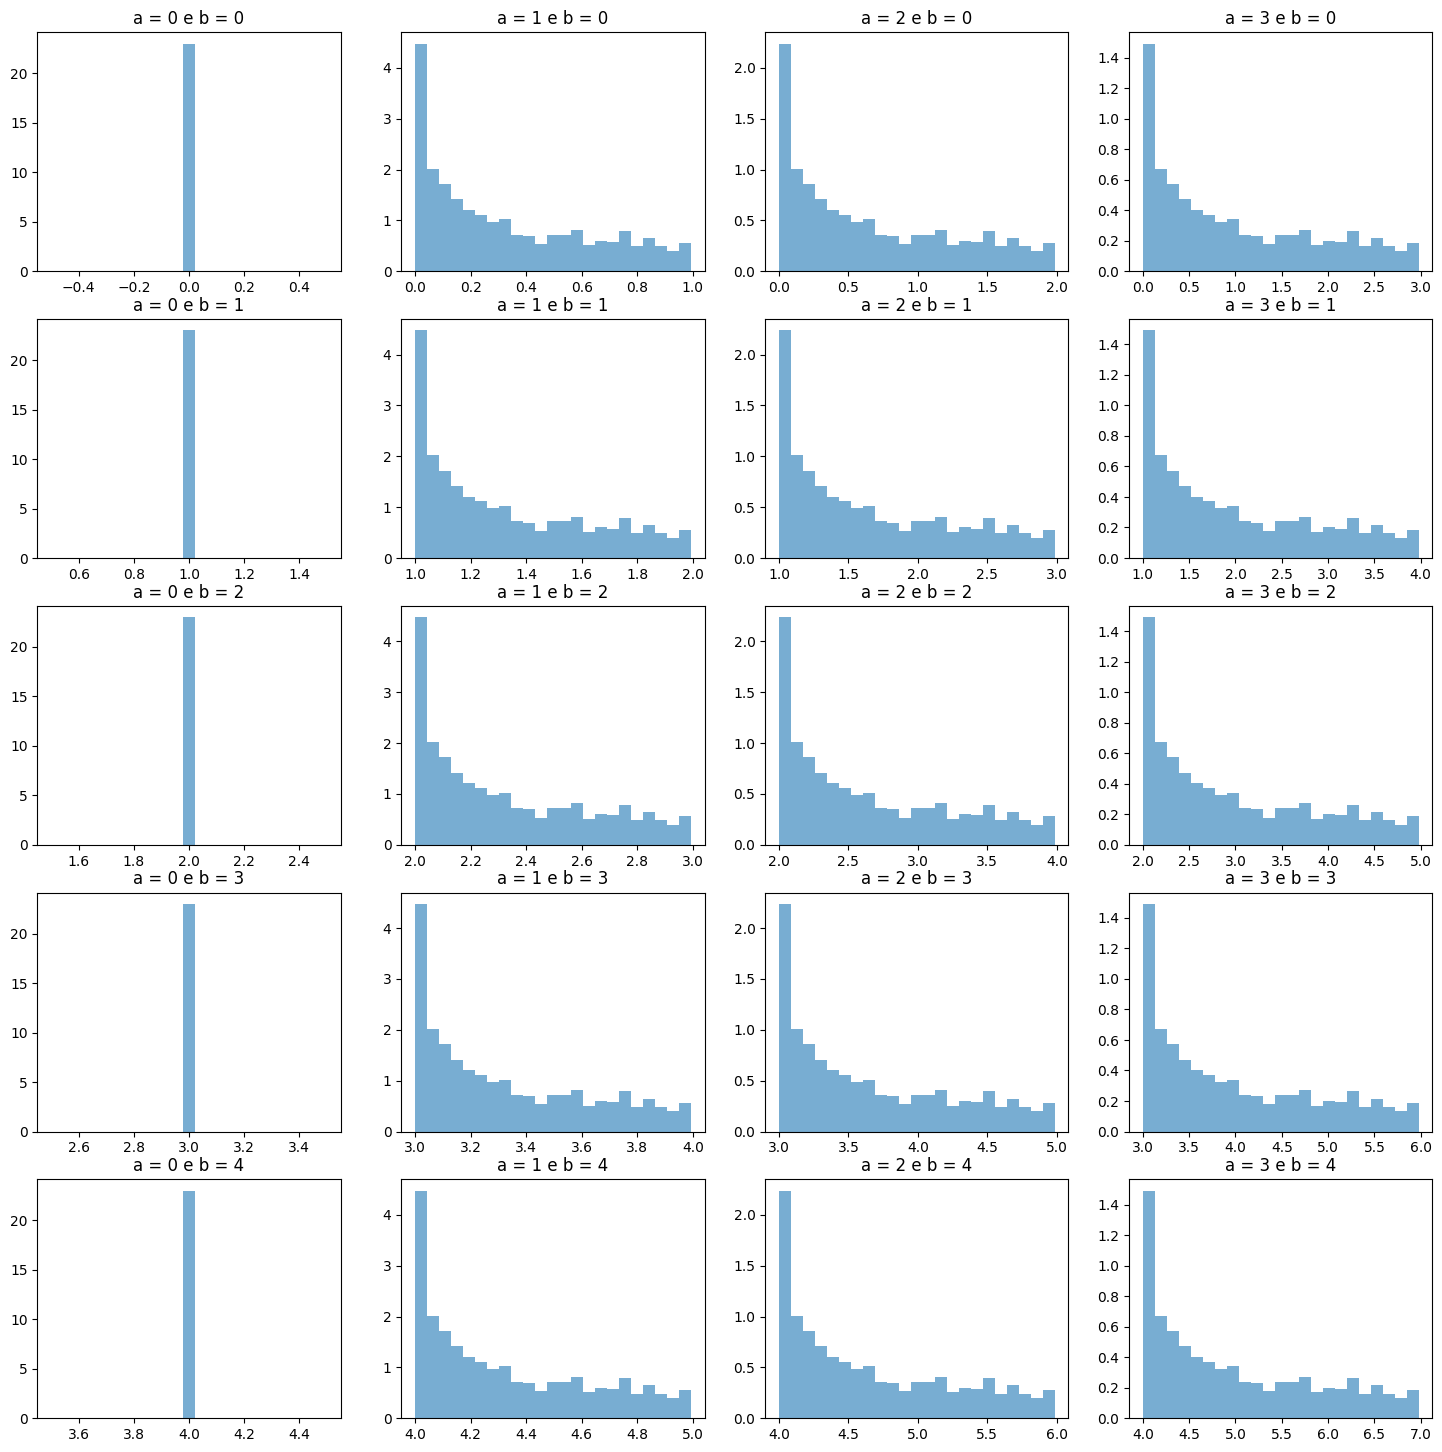

In [11]:
# plotagem dos histogramas f(Y)
# Organização da plotagem da figura
fig, axs = plt.subplots(5, 4, figsize=(18, 18))
ax = 0
ay = 0

# Cálculo de cada y e plotagem dos gráficos
for a, i in enumerate(a_values):
  for b, j in enumerate(b_values):
    # Plotagem do histograma
    y = calculate_Y(X, a, b)
    axs[ax, ay].hist(y, bins=int(1+3.22*np.log(num_samples)), density=True, alpha=0.6)
    axs[ax, ay].set_title(f'a = {a} e b = {b}')

    ax += 1
  ax = 0
  ay += 1

## Propriedades

1. $E[X] = \int_{a}^{b} x\cdot f(x) \,dx = \int_{a}^{b} x\cdot \frac{1}{b-a} = \frac{b+a}{2}$

2. $E[Y] = c \cdot E[X^2] + d = c \cdot \frac{b^2 + ab + a^2}{3} + d$

3. $E[X^2] = \int_{a}^{b} x^2\cdot \frac{1}{b-a} = \frac{a^2 + ab + b^2}{3}$

4. $E[Y^2] = E[(cX^2 + d)^2] = c^2E[X^4] + 2cdE[X^2] + d^2 = c^2\frac{(b-a)^4}{5} + 2cd\frac{a^2+ab+b^2}{3} + d^2$

5. $Var(X) = E[X^2] - (E[X])^2 = \frac{(b-a)^2}{12}$

6. $Var(Y) = Var(aX^2 + b) = a^2Var(X^2) = a^2\cdot\{E[X^4] - (E[X^2]^2)\}$

7. $σ(X) = \sqrt(Var(X))$

8. $σ(Y) = \sqrt(Var(Y))$

9. $Cov(X, Y) = \frac{\sum_{i=1}^{n} (x - m_x)\cdot(y-m_y)}{n}$

10. $Corr(X, Y) = \frac{Cov(X, Y)}{σ(X)\cdotσ(Y)}$

In [12]:
# Inicialização de arrays para armazenar resultados
# reais
mean_X_real = []
mean_Y_real = []
mean_X2_real = []
mean_Y2_real = []
var_X_real = []
var_Y_real = []
std_X_real = []
std_Y_real = []
corr_XY_real = []
cov_XY_real = []

# teóricas
mean_X_teorica = []
mean_Y_teorica = []
mean_X2_teorica = []
mean_Y2_teorica = []
var_X_teorica = []
var_Y_teorica = []
std_X_teorica = []
std_Y_teorica = []
corr_XY_teorica = []
cov_XY_teorica = []

In [13]:
# Limites a e b da V.A X
dist_a = 0
dist_b = 1

for a in a_values:
  for b in b_values:
    y = calculate_Y(X, a, b)

    mean_X_real.append(X.mean())
    mean_X_teorica.append((dist_b-dist_a)/2) # prop. 1
    mean_Y_real.append(y.mean())
    mean_Y_teorica.append(a * ((dist_b**2 + dist_b*dist_a + dist_a**2)/3) + b) # prop. 2

    mean_X2_real.append((X**2).mean())
    mean_X2_teorica.append((dist_a**2 + dist_a*dist_b + dist_b**2)/3) # prop. 3
    mean_Y2_real.append((y**2).mean())
    mean_Y2_teorica.append(a**2*(((dist_b-dist_a)**4)/5) + 2*a*b*mean_X2_teorica[-1] + b**2) # prop. 4

    var_X_real.append(X.var())
    var_X_teorica.append(((dist_b - dist_a)**2)/12) # prop. 5
    var_Y_real.append(y.var())
    var_Y_teorica.append(a**2*((((dist_b-dist_a)**4)/5) - mean_X2_teorica[-1]**2)) # prop. 6

    std_X_real.append(X.std())
    std_X_teorica.append(np.sqrt(var_X_real[-1])) # prop. 7
    std_Y_real.append(y.std())
    std_Y_teorica.append(np.sqrt(var_Y_teorica[-1])) # prop. 8

    cov_XY_real.append(np.cov(X, y)[0,1])
    cov_XY_teorica.append(np.sum((X-X.mean())*(y-y.mean()))/num_samples) # prop. 9
    corr_XY_real.append(np.corrcoef(X,y)[0,1])
    corr_XY_teorica.append(cov_XY_teorica[-1]/(std_X_teorica[-1]*std_Y_teorica[-1])) # prop. 10


    print(f'------------- a = {a}, b = {b} ----------------')
    print(f"Valor teórico de E[X] = {mean_X_teorica[-1]:.4f}")
    print(f"Valor real de E[X] = {mean_X_real[-1]:.4f}")
    print(f"Valor teórico de E[Y] = {mean_Y_teorica[-1]:.4f}")
    print(f"Valor real de E[Y] = {mean_Y_real[-1]:.4f}\n")
    print(f"Valor teórico de E[X^2] = {mean_X2_teorica[-1]:.4f}")
    print(f"Valor real de E[X^2] = {mean_X2_real[-1]:.4f}")
    print(f"Valor teórico de E[Y^2] = {mean_Y2_teorica[-1]:.4f}")
    print(f"Valor real de E[Y^2] = {mean_Y2_real[-1]:.4f}\n")
    print(f"Valor teórico de Var(X) = {var_X_teorica[-1]:.4f}")
    print(f"Valor real de Var(X) = {var_X_real[-1]:.4f}")
    print(f"Valor teórico de Var(Y) = {var_Y_teorica[-1]:.4f}")
    print(f"Valor real de Var(Y) = {var_Y_real[-1]:.4f}\n")
    print(f"Valor teórico de std(X) = {std_X_teorica[-1]:.4f}")
    print(f"Valor real de std(X) = {std_X_real[-1]:.4f}")
    print(f"Valor teórico de std(Y) = {std_Y_teorica[-1]:.4f}")
    print(f"Valor real de std(Y) = {std_Y_real[-1]:.4f}\n")
    print(f"Valor teórico de Cov(X, Y) = {cov_XY_teorica[-1]:.4f}")
    print(f"Valor real de Cov(X, Y) = {cov_XY_real[-1]:.4f}")
    print(f"Valor teórico de Corr(X, Y) = {corr_XY_teorica[-1]:.4f}")
    print(f"Valor real de Corr(X, Y) = {corr_XY_real[-1]:.4f}\n")

------------- a = 0, b = -1 ----------------
Valor teórico de E[X] = 0.5000
Valor real de E[X] = 0.5010
Valor teórico de E[Y] = -1.0000
Valor real de E[Y] = -1.0000

Valor teórico de E[X^2] = 0.3333
Valor real de E[X^2] = 0.3319
Valor teórico de E[Y^2] = 1.0000
Valor real de E[Y^2] = 1.0000

Valor teórico de Var(X) = 0.0833
Valor real de Var(X) = 0.0809
Valor teórico de Var(Y) = 0.0000
Valor real de Var(Y) = 0.0000

Valor teórico de std(X) = 0.2844
Valor real de std(X) = 0.2844
Valor teórico de std(Y) = 0.0000
Valor real de std(Y) = 0.0000

Valor teórico de Cov(X, Y) = 0.0000
Valor real de Cov(X, Y) = 0.0000
Valor teórico de Corr(X, Y) = nan
Valor real de Corr(X, Y) = nan

------------- a = 0, b = 0 ----------------
Valor teórico de E[X] = 0.5000
Valor real de E[X] = 0.5010
Valor teórico de E[Y] = 0.0000
Valor real de E[Y] = 0.0000

Valor teórico de E[X^2] = 0.3333
Valor real de E[X^2] = 0.3319
Valor teórico de E[Y^2] = 0.0000
Valor real de E[Y^2] = 0.0000

Valor teórico de Var(X) = 0.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-13-e40bcf290bfb>:32: RuntimeWarning: invalid value encountered in double_scalars
  corr_XY_teorica.append(cov_XY_teorica[-1]/(std_X_teorica[-1]*std_Y_teorica[-1])) # prop. 10
